### Лабораторная работа №1
#### Вариант 20

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

t_student = 1.99
fisher = 3.96

In [3]:
feature_1 = "Потребительские расход в среднем на душу населения (в месяц), руб."
feature_2 = "Валовой региональный продукт в 2019 г., млрд руб."

df = pd.read_excel("Data.xlsx", index_col=None);
df.index = df["Регион"]
df = df[[feature_1, feature_2]]
df = df.dropna()

df.head(10)

,"Потребительские расход в среднем на душу населения (в месяц), руб.","Валовой региональный продукт в 2019 г., млрд руб."
Регион,,
Белгородская область,26473.0,956.0
Брянская область,23765.0,397.7
Владимирская область,20653.0,537.4
Воронежская область,27110.0,1002.6
Ивановская область,20058.0,249.8
Калужская область,24683.0,545.1
Костромская область,20711.0,202.9
Курская область,22620.0,496.7
Липецкая область,25829.0,570.4


#### Показатели вариации

In [4]:
df.describe()

,"Потребительские расход в среднем на душу населения (в месяц), руб.","Валовой региональный продукт в 2019 г., млрд руб."
count,85.000000,85.000000
mean,23795.788235,1205.820000
std,7035.137888,2432.561205
min,9421.000000,56.600000
25%,19463.000000,273.500000
50%,22543.000000,559.100000
75%,26907.000000,1110.400000
max,51704.000000,19673.000000


#### Найдем аномальные значения

In [5]:
mask = df[feature_2] > df[feature_2].std() * 3
df[mask]

,"Потребительские расход в среднем на душу населения (в месяц), руб.","Валовой региональный продукт в 2019 г., млрд руб."
Регион,,
г. Москва,51704.0,19673.0
Тюменская область,32659.0,8919.1


#### Исключение аномальных областей

In [6]:
df = df[~mask]

#### Нанесем исходные данные на координатную плоскость

[]

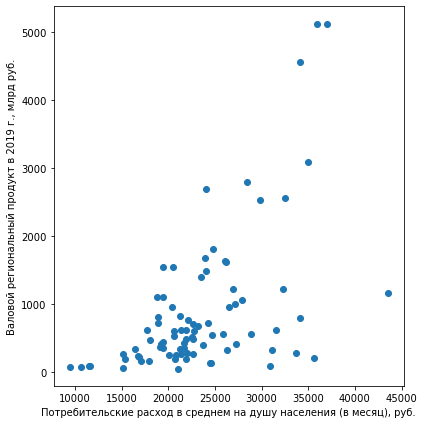

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(df[feature_1], df[feature_2])
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.tight_layout()
plt.plot()

#### Расчитаем линейный коэффициент парной корреляции по формуле:
## $\frac{cov(x,y)}{\sigma_x*\sigma_y}$

In [8]:
rxy = np.cov(df[feature_1], df[feature_2])[0,1] \
    / (np.std(df[feature_1]) * np.std(df[feature_2]))
print(f"rxy is {round(rxy,2)}")

rxy is 0.56


#### Проверим значимость линейного коэффициента корреляции, используя t критерий стъюдента по формуле
### $t_{r_{xy}}=r_{xy}*\frac{\sqrt{n-2}}{\sqrt{1-r^2_{xy}}}$

In [9]:
trxy = rxy * (np.sqrt(df.count()[0]-2) / np.sqrt(1-rxy**2))

print(f"trxy = {round(trxy,2)}")
print(f"|trxy| > t_student(0,95, {df.count()[0]}) is {trxy > t_student}")

trxy = 6.06
|trxy| > t_student(0,95, 83) is True


#### Следовательно коэффициент корреляции значим

#### Найдем коэффициенты уравнения регрессии
### $b=\frac{cov(x,y)}{\sigma_x^2}$ 
### $a=\bar y - b\bar x$

In [10]:
b = rxy * np.std(df[feature_2])/np.std(df[feature_1])
a = np.mean(df[feature_2]) - b*np.mean(df[feature_1])
print(f'y = {round(a, 2)} + {round(b,2)}*x')

def y(x):
    return a + b*x

y = -1247.33 + 0.09*x


#### Найдем сумму для 
### $y-y_{regr}$ и $(y-y_{regr})^2$

In [11]:
substr = np.round((df[feature_2] - y(df[feature_1])).sum(), 3)
substr_in_pow_2 = np.power((df[feature_2] - y(df[feature_1])), 2).sum()

#### Несмещенная оценка дисперсии возмущений:
### $S^2=\frac{\Sigma(y-\bar y)^2}{n-m-1}$
#### Стандартная ошибка регрессии:
### S = $\sqrt{S^2}$
#### Стадартное отклонение а:
### $S_a=S\frac{sqrt{\Sigma x^2}}{n\Sigma\bar y(x)}$
#### Стадартное отклонение b:
### $S_a=S\frac{1}{n\Sigma\bar y(x)}$

In [12]:
s_2 = substr_in_pow_2 / (df[feature_1].count() - 2)
s = np.sqrt(s_2)
s_a = s*np.sqrt(np.power(df[feature_1],2).sum()) / \
    (df[feature_1].count() * y(df[feature_1]).sum())
    
s_b = s / \
    (df[feature_1].count() * y(df[feature_1]).sum())

print(f's^2 is {round(s_2,2)}')
print(f's is {round(s,2)}')
print(f's_a is {round(s_a,2)}')
print(f's_b is {round(s_b,2)}')

s^2 is 758209.01
s is 870.75
s_a is 31.28
s_b is 0.0


#### t-статистика
### $t_a=\frac{a}{S_a}$

In [13]:
t_a = a / s_a
print(f't_a = {round(t_a,2)}')
print(f'|t_a| > t_student is {np.abs(t_a) > t_student}')

t_a = -39.88
|t_a| > t_student is True


#### Т.к. $|t_a| > t_{крит}(0,95, 85)$, следовательно коэффициент а статистически значим

### $t_b=\frac{b}{S_b}$

In [14]:
t_b = b / s_b
print(f't_b = {round(t_b,2)}')
print(f'|t_b| > t_student is {np.abs(t_b) > t_student}')

t_b = 644.85
|t_b| > t_student is True


#### Т.к. $|t_b| > t_{крит}(0,95, 85)$, следовательно коэффициент b статистически значим

### Для значимых коэффициентов построим доверительные интервалы:
#### для а - $(a-t_{крит}*S_a;a+t_{крит}*S_a)$

In [15]:
print(f'({round(a - t_student*s_a,2)};{round(a + t_student*s_a,2)}))')

(-1309.57;-1185.09))


#### для а - $(b-t_{крит}*S_b;b+t_{крит}*S_b)$

In [16]:
print(f'({round(b - t_student*s_b,3)};{round(b + t_student*s_b,3)})')

(0.091;0.092)


#### Коэффициент детерминации
### $R^2 = 1-\frac{\Sigma(y-\bar y)^2}{\Sigma(y-y_{срд})^2}$

In [17]:
R_2 = 1 - substr_in_pow_2 / np.sum(np.power(df[feature_2]-df[feature_2].mean(), 2))
round(R_2,2)

0.3

### Статистика Фишера 
#### $F=\frac{R^2}{1-R^2}\frac{n-m-1}{m}$

In [18]:
F = R_2 / (1-R_2) * (df[feature_1].count() - 2)
round(F,2)

35.42

#### Сравним $F$ и $F_{крит}(0,05,1,83)$

In [19]:
print(f'F > F_krit is {F > fisher}')

F > F_krit is True


#### Следовательно уравнение регрессии надёжно

#### Выполним точечный прогноз величины y в точке $x_p=x_{max}*1.1$

In [20]:
x_p = df[feature_1].max() * 1.1
y_p = y(x_p)
print(f'x_p = {round(x_p,2)}, y_p = {round(y_p,2)}')

x_p = 47863.2, y_p = 3134.09


#### Расчитаем доверительные интервалы для уравнения регрессии и для результативного признака $y_p$ при доверительной вероятности $\alpha=0.95$
### $\bar y_p - t_{кр}\sigma_{\bar y_p} <= y_p <= \bar y_p + t_{кр}\sigma_{\bar y_p}$
### $\sigma_{\bar y_p} = S\sqrt{1+\frac{1}{n}+\frac{(x_p-\bar x)^2}{\Sigma(x-\bar x)^2}}$

In [21]:
sigma_yp = s * np.sqrt(1 + 1 / df[feature_1].count() \
    + (x_p - df[feature_1].mean())**2 / ((df[feature_1] - \
        df[feature_1].mean())**2).sum())
print(f'sigma_yp = {round(sigma_yp,2)}')
print(f'{round(y_p - t_student*sigma_yp,2)} <= yp <= {round(y_p + t_student*sigma_yp,2)}')

sigma_yp = 951.87
1239.87 <= yp <= 5028.32


#### Построим таблицу дисперсионного анализа

In [35]:
dt = pd.DataFrame(columns=['Сумма квадратов', 'Число степеней свободы', 'дисперсия на одну степень свободы'])

dt.loc['Общая'] = {
    'Сумма квадратов':(df[feature_2] - df[feature_2].mean()).pow(2).sum(), 
    'Число степеней свободы':df[feature_1].count() - 1, 
    'дисперсия на одну степень свободы':(df[feature_2] - df[feature_2].mean()).pow(2).sum() /  df[feature_1].count() - 1}

dt.loc['Факторная'] = {
    'Сумма квадратов':(df[feature_2].mean() - y(df[feature_1])).pow(2).sum(), 
    'Число степеней свободы':df[feature_1].count() - 1, 
    'дисперсия на одну степень свободы':(df[feature_2].mean() - y(df[feature_1])).pow(2).sum()}

dt.loc['Остаточная'] = {
    'Сумма квадратов':(df[feature_2] - y(df[feature_1])).pow(2).sum(), 
    'Число степеней свободы':df[feature_1].count() - 1, 
    'дисперсия на одну степень свободы':(df[feature_2] - y(df[feature_1])).pow(2).sum() /  df[feature_1].count() -2}

dt

,Сумма квадратов,Число степеней свободы,дисперсия на одну степень свободы
Общая,8.826828e+07,82,1.063472e+06
Факторная,2.751640e+07,82,2.751640e+07
Остаточная,6.141493e+07,82,7.399369e+05


### Рассчитаем среднюю ошибку аппроксимации

In [37]:
a_mean = ((df[feature_2] - y(df[feature_1])) / df[feature_2]).abs().mean() * 100
a_mean

150.58446660686852

### Построим уравнение регрессии на графике с исходными данными

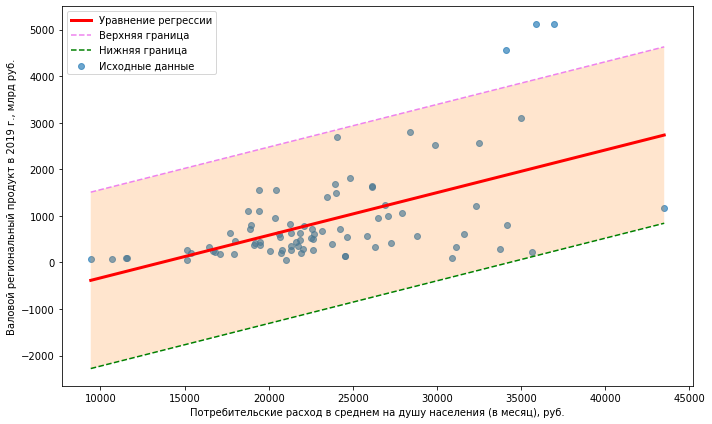

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df[feature_1], df[feature_2], alpha=0.65, label='Исходные данные')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.plot(df[feature_1].sort_values(), y(df[feature_1].sort_values()), color='red', lw=3, label='Уравнение регрессии')
plt.plot(df[feature_1].sort_values(), y(df[feature_1].sort_values()) + t_student*sigma_yp, color='violet', ls='--', label='Верхняя граница')
plt.plot(df[feature_1].sort_values(), y(df[feature_1].sort_values()) - t_student*sigma_yp, color='green', ls='--', label='Нижняя граница')
x = np.linspace(df[feature_1].min(), df[feature_1].max(), 1000)
y1 = y(x) + t_student*sigma_yp
y2 = y(x) - t_student*sigma_yp
plt.fill_between(x, y1, y2, alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()